In [1]:
%matplotlib inline
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt

In [53]:
import pandas as pd

In [2]:
def load_npy(filename):
    return np.load(filename)

In [3]:
def _common_output(filename='output'):
    array = load_npy(filename)
    output_mem = array[:,0]
    output_cpu = array[:,1]
    output_time = array[:,2]
    _mems = []
    _cpus = []
    _times = []
    for i, j, k in zip( output_mem, output_cpu, output_time):
        _mems.extend(i)
        _cpus.extend(j)
        _times.extend(k)
    return _mems, _cpus, _times

In [4]:
def _common_output_dev(filename='output'):
    array = load_npy(filename)
    output_time = array[:,2]
    _times = []
    for k in  output_time:
        print(" ----- ")
        print(np.asarray(k).shape)
        print(np.amax(k) )
        print(np.amin(k) )
        tmax = np.amax(k)
        ctime = tmax - np.amin(k)
        _times.append(ctime)
    return _times

In [5]:
def _common_output_dev2(filename='output'):
    array = load_npy(filename)
    output_time = array[:,2]
    _times = []
    for k in  output_time:
        _times.extend(k)
    return max(_times)

In [100]:
def fill_val(array1d, inarray):
    for idx, i in enumerate(inarray) :
        array1d[idx] = i
    array1d[len(inarray):] = np.nan
    return array1d

In [6]:
workdir='/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob'

In [142]:
app_type='app2'
exp_type='grd'  # /total/grd 

In [143]:
output1_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-1_slurm-*')
output1_list.sort()

In [144]:
output2_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-2_slurm-*')
output2_list.sort()

In [145]:
output3_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app2-3_slurm-*')
output3_list.sort()

In [46]:
output4_list = glob.glob(workdir+'/'+app_type+'_'+exp_type+'/outputs_app-4_slurm-*')
output4_list.sort()

In [146]:
output3_list

['/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58470941-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58471031-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58471128-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58471208-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58471292-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58472336-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app2_grd/outputs_app2-3_slurm-58472881-htex_gradient.npy',
 '/home/tkurihana/scratch-midway2/parsl/parsl/dataflow/workspace/workjob/app

### Estimated run time 

In [13]:
def gtime(_filelist):
    times = []
    for ifile in _filelist:
        _mem, _cpu, _time = _common_output(filename=ifile)
        init_time = np.amin(_time)
        end_time = np.amax(_time)
        etime = end_time - init_time
        times.append(etime)
    return times

In [14]:
def gtime_dev(_filelist):
    times = []
    for ifile in _filelist:
        _time = _common_output_dev2(filename=ifile)
        #print(_time)
        mean_time = np.mean(_time)
        times.append(mean_time)
    return times

In [147]:
times = []
for _filelist in [output3_list]:
    times += [ gtime_dev(_filelist) ]

In [148]:
times

[[293.26441502571106,
  339.01940131187439,
  343.9579074382782,
  338.26167035102844,
  293.22823762893677,
  343.70753240585327,
  338.18057894706726,
  288.1692316532135,
  299.66939496994019,
  293.47671723365784,
  338.3734610080719,
  294.70512843132019,
  348.49015021324158,
  293.0173807144165,
  338.41424345970154,
  343.35796189308167,
  339.34048128128052,
  353.57371520996094,
  338.237459897995,
  352.8518922328949]]

In [149]:
np.asarray(times).shape

(1, 20)

In [150]:
runtime = times

In [301]:
#runtime = np.sum(times, axis=0)

### Save data here

In [122]:
app2_default = runtime

In [132]:
app2_simple = runtime

In [141]:
app2_total = runtime

In [151]:
app2_grd = runtime

### Plot

In [152]:
nx = max(len(app2_default[0]), len(app2_simple[0]), len(app2_total[0]), len(app2_grd[0]) )

In [153]:
nx

28

In [154]:
_app2_default = np.zeros((nx)) 
_app2_simple = np.zeros((nx))
_app2_total = np.zeros((nx))
_app2_grd = np.zeros((nx))

_app2_default[:] = np.nan
_app2_simple[:] = np.nan
_app2_total[:] = np.nan
_app2_grd[:] = np.nan

In [155]:
app2_default_ = fill_val(_app2_default, app2_default[0])
app2_simple_ = fill_val(_app2_simple, app2_simple[0])
app2_total_ = fill_val(_app2_total, app2_total[0])
app2_grd_ = fill_val(_app2_grd, app2_grd[0])

In [157]:
app2_default_

array([ 319.7878828 ,  318.94517517,  311.47665596,  261.32783937,
        263.87622643,  311.00767922,  261.99161935,  318.41190434,
        321.42404175,  320.09472346,  317.91795206,  261.68792105,
        318.77893853,  255.87197113,  325.66178989,  319.84560037,
        269.1239624 ,  315.67158675,  323.61845756,  322.74307513,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan])

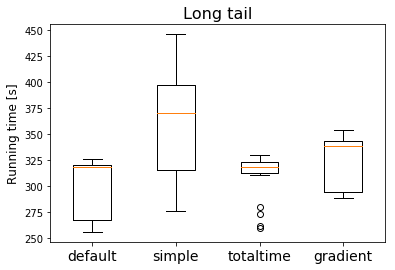

In [158]:
app = 'app2'
ename='Long tail'
data_list = [np.asarray(app2_default_).reshape(nx, 1),
             np.asarray(app2_simple_).reshape(nx, 1), 
             np.asarray(app2_total_).reshape(nx, 1), 
             np.asarray(app2_grd_).reshape(nx, 1) 
           ]

data = np.concatenate([ x for x in data_list ] , axis=1)

df = pd.DataFrame(data)

fig1, ax1 = plt.subplots()
ax1.set_title(ename, fontsize = 16)
#plt.xlabel('Strategy', fontsize = 12)
plt.ylabel('Running time [s]', fontsize = 12)
#df.boxplot()
ax1.boxplot(df.dropna().values)
plt.xticks(np.asarray([1,2,3,4]), ["default","simple", "totaltime", "gradient"], fontsize=14)
fig1.savefig('./'+str(app)+'_boxplot.png')

In [ ]:
app = 'app1'
ename='MapReduce'
data_list = [np.asarray(_app2_default).reshape(nx, 1),
             np.asarray(_app2_simple).reshape(nx, 1), 
             np.asarray(_app2_total).reshape(nx, 1), 
             np.asarray(_app2_grd).reshape(nx, 1) 
           ]

data = np.concatenate([ x for x in data_list ] , axis=1)

fig1, ax1 = plt.subplots()
ax1.set_title(ename, fontsize = 16)
#plt.xlabel('Strategy', fontsize = 12)
plt.ylabel('Running time [s]', fontsize = 12)
ax1.boxplot(data);
plt.xticks(np.asarray([1,2,3,4]), ["default","simple", "totaltime", "gradient"], fontsize=14)
fig1.savefig('./'+str(app)+'_boxplot.png')